#  <font color = orange> <font size = 8>  **An√°lise da Serie Hist√≥rica dos Valores de Criptomoedas.**

---

<center><img alt="Logo anp" width="30%" src="./img/banner.jpg"></center>

## **1. Objetivo do relat√≥rio** üéØ

Este projeto tem como objetivo realizar uma an√°lise explorat√≥ria dos valores hist√≥ricos de criptomoedas, assim como tamb√©m realizar o tratamento desses dados e por fim realizar consultas trazendo insights importantes para futuras tomadas de decis√µes.

Esta an√°lise ir√° nos responder as seguintes perguntas:

1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tend√™ncia de queda ou de aumento?
2. Quais os valores m√©dios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valoriza√ß√µes?
4. Existe alguma tend√™ncia de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em rela√ß√£o √† valoriza√ß√£o pela an√°lise da s√©rie
hist√≥rica?
6. Qual moeda se mostra menos interessante em rela√ß√£o √† valoriza√ß√£o pela an√°lise da s√©rie
hist√≥rica?
7. Existe correla√ß√£o entre os valores para todas as criptomoedas?

##### **1.1. Sobre os dados utilizados**

Os dados fornecidos para a execu√ß√£o desse relat√≥rio s√£o informa√ß√µes hist√≥ricas de pre√ßos de algumas das principais criptomoedas por capitaliza√ß√£o de mercado. Podemos baixar os arquivos csv  que ser√£o usados [neste link](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).

---

## **2. Coleta dos dados** üé≤

Para podermos iniciar nossos trabalhos, primeiramente iremos importar as bibliotecas que ser√£o usadas para a explora√ß√£o e poss√≠veis tratamentos, e logo depois coletar os dados necess√°rios e fornecidos para a execu√ß√£o deste relat√≥rio.

##### **2.1. Importa√ß√£o das bibliotecas que ser√£o utilizadas**

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Utilizando a biblioteca warnings para retirar avisos da execu√ß√£o do c√≥digo para uma visualiza√ß√£o mais limpa.
warnings.filterwarnings('ignore')

# Mostrando vers√µes utilizadas dos pacotes:
print('Pacotes Prontos! Vers√µes Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy     --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn  --> {sns.__version__}')

Pacotes Prontos! Vers√µes Utilizadas:

Pandas      --> 1.5.3
Numpy     --> 1.23.5
Matplotlib  --> 3.7.1
Seaborn  --> 0.12.2


##### **2.2. Coleta dos dados necess√°rios para an√°lise**

Agora iremos coletar os dados que ser√£o ultilizados fazendo a leitura dos arquivos .csv que est√£o dispon√≠veis na pasta "**data_10**" no reposit√≥rio deste projeto.

In [2]:
#Caminho da pasta onde est√£o os arquivos CSV
pasta = './data_10/'

#Lista todos os arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

#Variavel onde ser√° armazenada o dataframe
data_df = pd.DataFrame()

#Esse loop percorre os arquivos csv e l√™ cada um deles
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(pasta, arquivo)
    dados = pd.read_csv(caminho_arquivo)
    print(f'Moeda: {arquivo} coletada com sucesso!')

    #Concatena cada um dos csv ao dataframe
    data_df = pd.concat([data_df, dados], ignore_index=True)

#Todos os arquivos csv que se encontram na pasta data_10 (10 arquivos) foram concatenados e salvos na variavel data_df

Moeda: coin_Solana.csv coletada com sucesso!
Moeda: coin_Cardano.csv coletada com sucesso!
Moeda: coin_Bitcoin.csv coletada com sucesso!
Moeda: coin_Aave.csv coletada com sucesso!
Moeda: coin_Litecoin.csv coletada com sucesso!
Moeda: coin_Ethereum.csv coletada com sucesso!
Moeda: coin_Dogecoin.csv coletada com sucesso!
Moeda: coin_Tether.csv coletada com sucesso!
Moeda: coin_BinanceCoin.csv coletada com sucesso!
Moeda: coin_CryptocomCoin.csv coletada com sucesso!


## **3. An√°lise explorat√≥ria** üîç

Com os dados carregados iremos ter nosso primeiro contato com eles e conhece-los melhor, compreendendo suas caracter√≠sticas que o definem e sua estrutura.

##### **3.1. Dimens√£o do DataSet e primeira visualiza√ß√£o**

In [3]:
#vis√£o 5 primeiras e 5 √∫ltimas linhas do DataSet
data_df

SNo             Name Symbol                 Date      High       Low  \
0        1           Solana    SOL  2020-04-11 23:59:59  1.049073  0.765020   
1        2           Solana    SOL  2020-04-12 23:59:59  0.956670  0.762426   
2        3           Solana    SOL  2020-04-13 23:59:59  0.891603  0.773976   
3        4           Solana    SOL  2020-04-14 23:59:59  0.796472  0.628169   
4        5           Solana    SOL  2020-04-15 23:59:59  0.704964  0.621531   
...    ...              ...    ...                  ...       ...       ...   
17693  931  Crypto.com Coin    CRO  2021-07-02 23:59:59  0.114202  0.108968   
17694  932  Crypto.com Coin    CRO  2021-07-03 23:59:59  0.119593  0.112773   
17695  933  Crypto.com Coin    CRO  2021-07-04 23:59:59  0.125262  0.117165   
17696  934  Crypto.com Coin    CRO  2021-07-05 23:59:59  0.122467  0.113482   
17697  935  Crypto.com Coin    CRO  2021-07-06 23:59:59  0.124989  0.115725   

           Open     Close        Volume     Marketcap  
0      0.951054  0.776819  4.386244e+07  0.000000e+00  
1      0.785448  0.882507  3.873690e+07  0.000000e+00  
2      0.890760  0.777832  1.821129e+07  0.000000e+00  
3      0.777832  0.661925  1.674761e+07  0.000000e+00  
4      0.669289  0.646651  1.307528e+07  0.000000e+00  
...         ...       ...           ...           ...  
17693  0.112168  0.113914  4.495990e+07  2.877801e+09  
17694  0.113903  0.118407  4.578038e+07  2.991307e+09  
17695  0.118389  0.122427  4.174486e+07  3.092883e+09  
17696  0.122467  0.115814  4.728913e+07  2.925805e+09  
17697  0.115725  0.122856  1.520764e+08  3.103718e+09  

[17698 rows x 10 columns]

In [4]:
#Visualizando 5 linhas aleat√≥rias do DataSet
data_df.sample(5)

SNo      Name Symbol                 Date       High        Low  \
576     125   Cardano    ADA  2018-02-03 23:59:59   0.501639   0.330815   
7552   2461  Litecoin    LTC  2020-01-23 23:59:59  58.476700  53.385657   
7196   2105  Litecoin    LTC  2019-02-01 23:59:59  33.449443  31.127136   
6342   1251  Litecoin    LTC  2016-09-30 23:59:59   3.852480   3.819530   
12457  2215  Dogecoin   DOGE  2020-01-08 23:59:59   0.002465   0.002265   

            Open      Close        Volume     Marketcap  
576     0.400965   0.438836  1.404500e+09  1.137773e+10  
7552   58.350388  54.630260  3.348003e+09  3.492097e+09  
7196   31.719522  32.827079  8.259777e+08  1.978857e+09  
6342    3.844500   3.841600  2.104930e+06  1.835884e+08  
12457   0.002433   0.002293  7.725153e+07  2.815942e+08

Observando de forma geral nosso DataSet podemos observar que temos v√°rias criptomoedas listadas e ordenadas por ordem alfab√©tica. Temos o nome da criptomoeda e o s√≠mbolo que a identifica. Podemos perceber tamb√©m que cada linha √© um dia diferente e referente ao desempenho que tal moeda se teve naquele dia, mostrando como por exemplo o pre√ßo de abertura e fechamento do dia em quest√£o.

Podemos constatar tamb√©m que nosso DataSet possui **17.698 linhas/registros** por **10 colunas/vari√°veis**.

##### **3.2. Dicion√°rio das colunas/vari√°veis**

Ao verificar as 10 colunas existentes do DataSet, podemos fazer um dicion√°rio para dar um significado mais amplo para elas e ent√£o compreender melhor cada v√°riavel.

* `SNo` - Id para identifica√ß√£o das criptomoedas.
* `Name` - Nome da criptomoeda.
* `Symbol` - S√≠mbolo da criptomoeda.
* `Date` - Data da observa√ß√£o e coleta dos valores.
* `High` - Pre√ßo mais **ALTO** em um determinado dia.
* `Low` - Pre√ßo mais **BAIXO** em um determinado dia.
* `Open` - Pre√ßo de abertura em determinado dia.
* `Close` - Pre√ßo de fechamento em determinado dia.
* `Volume` - Volume de transa√ß√µes em um determinado dia.
* `Marketcap` - Capitaliza√ß√£o de mercado em d√≥lares americanos. Marketcap √© uma m√©trica que representa o valor total de mercado de uma criptomoeda em circula√ß√£o.

##### **3.3. Checando os tipos de dados**

Ao compreender o que significa cada coluna/v√°riavel, podemos verificar quais os tipos de dados que comp√µem cada uma delas.


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        17698 non-null  int64  
 1   Name       17698 non-null  object 
 2   Symbol     17698 non-null  object 
 3   Date       17698 non-null  object 
 4   High       17698 non-null  float64
 5   Low        17698 non-null  float64
 6   Open       17698 non-null  float64
 7   Close      17698 non-null  float64
 8   Volume     17698 non-null  float64
 9   Marketcap  17698 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


Ao verificar os tipos de dados de cada v√°riavel, podemos notar um √∫nico problema na coluna **"Date"** que est√° como do tipo **object**, ou seja, ela est√° como uma string e n√£o como uma data. Iremos realizar esse tratamento logo mais.

##### **3.4. Verificando valores nulos**

Ao verificar valores nulos, podemos ter o concentimento se teremos que realizar o tratamento desses valores, ou se apenas podemos remove-los do DataSet. Os valores nulos atrapalham nossas analises com poss√≠veis erros e dificultam uma modelagem e previs√µes.

In [6]:
data_df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Nosso DataSet n√£o cont√©m valores nulos, portanto, seguiremos explorando o DataSet.

##### **3.5. Checando Outliers**

Nesta etapa verificaremos outliers em nosso DataSet, mas ser√° que devemos buscar outliers e leva-los em considera√ß√£o com esses dados?

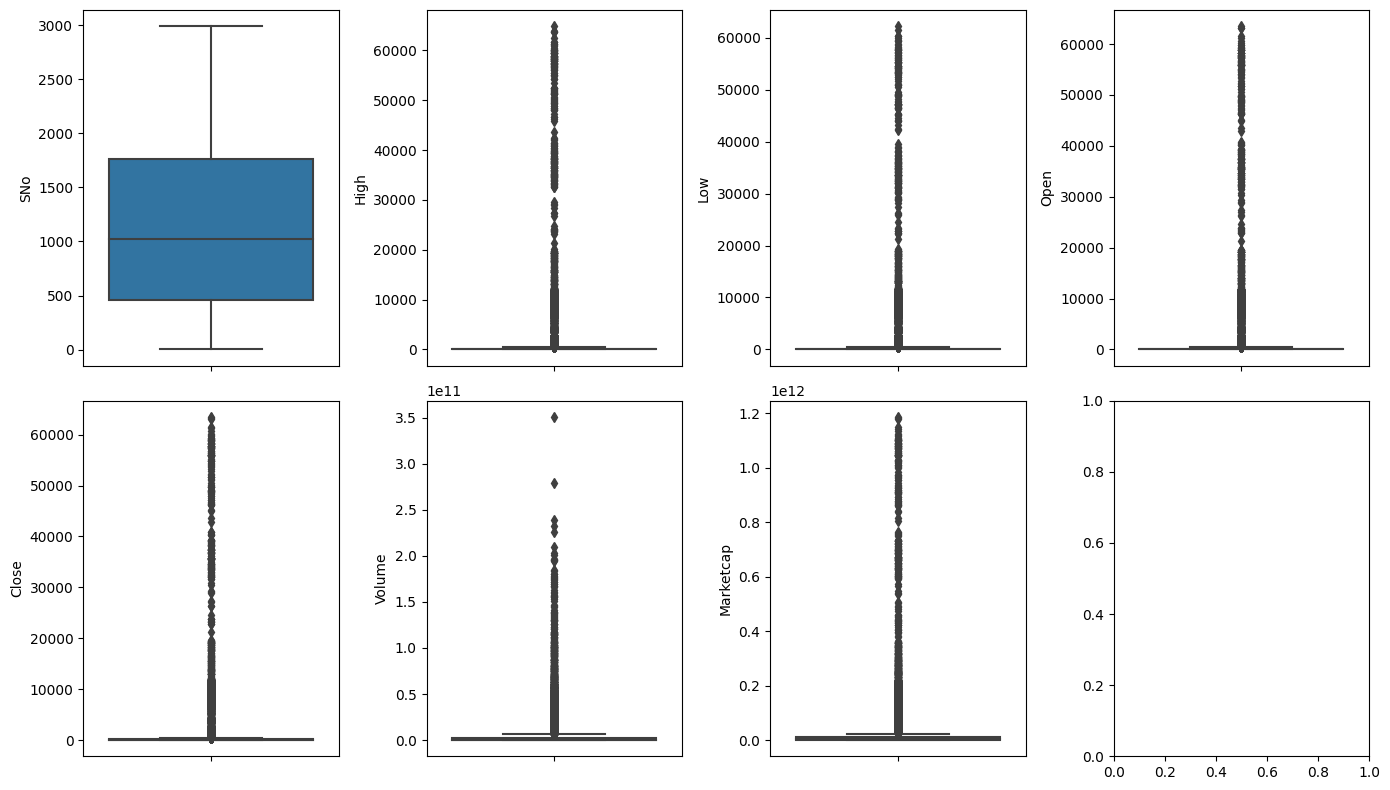

In [7]:
#Este loop percorre as colunas do DataSet verificando se tal v√°riavel √© n√∫merica, caso sim, √© adicionado na lista
variaveis_numericas = []
for i in data_df.columns[0:21].tolist():
        if data_df.dtypes[i] == 'int64' or data_df.dtypes[i] == 'float64':
            # print(i, ':' , eleitorado.dtypes[i])
            variaveis_numericas.append(i)

#Criando gr√°fico
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 4)

linha = 0
coluna = 0

#Este loop percorre a lista da colunas n√∫mericas e plota um gr√°fico para cada v√°riavel
for i in variaveis_numericas:
    sns.boxplot(data = data_df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

Observando os gr√°ficos boxplot para cada v√°riavel acima, podemos constatar de fato que com esses dados n√£o devemos considerar outliers, pois s√£o valores espec√≠ficos de pre√ßos das criptomoedas, ou seja, os pre√ßos variam muito durante os anos em que os dados das criptomoedas foram coletadas. Por exemplo, em 2013 o Bitcoin tinha um valor muito abaixo do que ele teve em 2021 [(Fonte)](https://academy.bit2me.com/pt/precio-historico-del-bitcoin/). Por esse motivo, essa an√°lise de outliers n√£o cabe a esta ocasi√£o.

##### **3.6. Analisando correla√ß√µes**

Nesta etapa iremos analisar o grau de relacionamento entre as v√°riaveis do nosso DataSet.

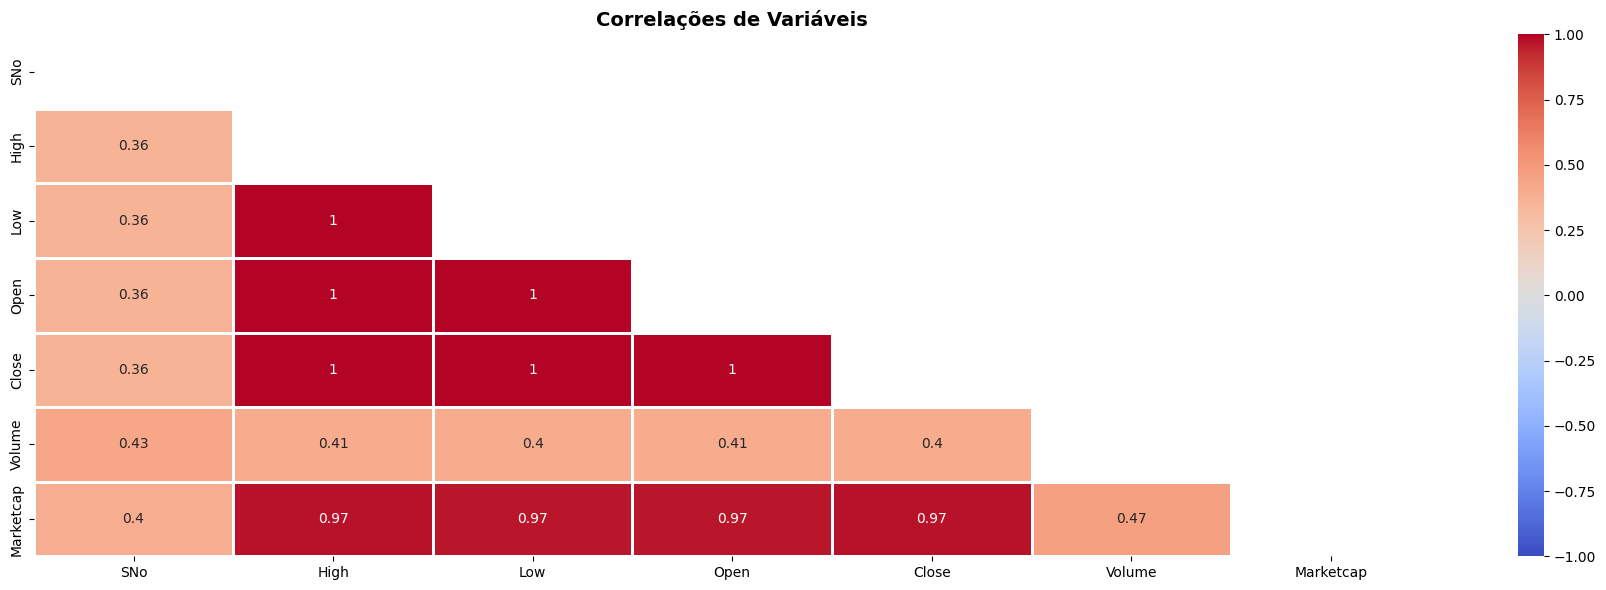

In [8]:
#Usando o metodo corr() para verificar a correla√ß√£o das variaveis
correlacao_data = data_df.corr()

#Criando uma m√°scara triangular superior
mask = np.triu(np.ones_like(correlacao_data, dtype=bool))

#Definindo tamanho da figura:
fig, ax = plt.subplots(figsize=(18, 6))

#Criando o Heatmap:
ax = sns.heatmap(data=correlacao_data,
                 mask=mask,
                 vmin=-1,
                 vmax=1,
                 annot=True,
                 linewidths=1,
                 cmap='coolwarm')

# Formata√ß√£o:
plt.title('Correla√ß√µes de Vari√°veis', pad=6, fontdict={'size': 14, 'weight': 'bold'})

plt.show()

Ao analisar o Heatmap acima, podemos notar algumas v√°riaveis que se tem uma correla√ß√£o perfeita. Isso acontece pois, assim como a an√°lise feita com os outliers no t√≥pico anterior, as criptomoedas tiveram um grande aumento de pre√ßo ao decorrer de todos os anos registrados nesse DataSet. Por exemplo, quando mais aumentavam o pre√ßo de abertura(open) e o de fechamento(close) mais aumentavam o valor de capitaliza√ß√£o de mercado(Marketcap). [(Fonte)](https://livecoins.com.br/preco-historico-do-bitcoin/#:~:text=Em%202017%20o%20Bitcoin%20alcan%C3%A7ou,superou%20os%20US%24%2029%20mil.)

---

## **4. Tratamento dos dados** üìö

Nessa etapa faremos o tratamento dos dados que coletamos e conhecemos nas etapas acima, ser√£o analisados quais colunas e dados n√£o necessitaremos para obter nossos insights, e quais dados precisar√£o ser tratados.

Ao explorar os dados coletados podemos pontuar alguns tratamento que precisamos realizar no DataSet:

- Remover coluna **"SNo"**, pois se trata de apenas um id para identifica√ß√£o das criptos.
- Renomear as colunas para portugu√™s, facilitando o entendimento.
- Retirar a hora na coluna **"Date"**, pois √© uma informa√ß√£o irrelevante.
- Mudar o tipo de dado da coluna **"Date"** para formato de data, pois est√° como object.

Como iremos alterar e modificar nosso DataSet, primeiramente vamos criar uma c√≥pia para podermos realizar os tratamento neces√°rios. O nome do DataSet limpo ser√° **data_clean**.

##### **4.1. Definir colunas necess√°rias**

In [9]:
#Deletando coluna e salvando em nova varaivel
data_clean = data_df.drop('SNo', axis=1)

data_clean.sample()

Name Symbol                 Date      High       Low      Open  \
10519  Dogecoin   DOGE  2014-09-18 23:59:59  0.000325  0.000267  0.000268   

          Close     Volume     Marketcap  
10519  0.000298  2215910.0  2.744258e+07

Podemos constatar que a coluna **"SNo"** foi removida do nosso DataSet.

##### **4.2. Renomeando colunas**

In [10]:
#Definindo nomes das v√°riaveis que ser√£o renomeados
data_clean.rename(
    columns={
        'Name': 'Nome',
        'Symbol': 'Simbolo',
        'Date': 'Data',
        'High': 'Maximo',
        'Low': 'Minimo',
        'Open': 'Abertura',
        'Close': 'Fechamento',
        'Volume': 'Volume',
        'Marketcap': 'Cap. de Mercado'
    }, inplace=True
)

data_clean.sample()

Nome Simbolo                 Data      Maximo      Minimo  \
2942  Bitcoin     BTC  2016-05-19 23:59:59  454.632996  438.714996   

        Abertura  Fechamento      Volume  Cap. de Mercado  
2942  454.523987  438.714996  96027400.0     6.827425e+09

Como podemos observar todas as v√°riaveis foram renomeadas para portugu√™s facilitando o entendimento das mesmas.

##### **4.3. Tratando a v√°riavel "Data"**

A coluna **"Data"** refere-se a data em que ocerreu a coleta dos dados de determinada moeda. Por√©m nos registros junto com a data, temos a hora, os minutos e segundo em que ocorreu essa coleta. Como a hora √© igual para todos os registros de todas as criptomoedas, iremos remove-la pois torna-se uma informa√ß√£o irrelevante para este relat√≥rio.

In [11]:
#filtrando a coluna data e
data_clean['Data'] = pd.to_datetime(data_clean['Data']).dt.date

data_clean.sample()

Nome Simbolo        Data    Maximo    Minimo  Abertura  Fechamento  \
11325  Dogecoin    DOGE  2016-12-02  0.000221  0.000212  0.000214    0.000216   

        Volume  Cap. de Mercado  
11325  94691.5     2.315125e+07

Como podemos constatar na coluna **Data** as horas foram retiradas, deixando apenas a informa√ß√£o de data no formato YYYY-MM-DD.

Seguindo nosso tratamento, agora iremos alterar o tipo de dado da v√°riavel em quest√£o. Ela est√° com os registros do tipo "object", ou seja, est√° como uma string, abaixo faremos essa convers√£o para o tipo "datetime".

In [12]:
#Mudando o tipo de object para datetime
data_clean['Data'] = data_clean['Data'].apply(pd.to_datetime)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nome             17698 non-null  object        
 1   Simbolo          17698 non-null  object        
 2   Data             17698 non-null  datetime64[ns]
 3   Maximo           17698 non-null  float64       
 4   Minimo           17698 non-null  float64       
 5   Abertura         17698 non-null  float64       
 6   Fechamento       17698 non-null  float64       
 7   Volume           17698 non-null  float64       
 8   Cap. de Mercado  17698 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.2+ MB


Como podemos constatar, a v√°riavel "data" est√° agora do tipo correto como "datetime". Essa mudan√ßa possibilita uma melhor agilidade e tira a possibilidade de erros futuros, quando formos realizar an√°lises com essa v√°riavel.

Para finalizar esta etapa, vamos salvar em um novo arquivo csv, o DataSet tratado e modificado com as a√ß√µes necess√°rias.

In [13]:
#definindo o caminho da pasta e o nome do arquivo a ser salvo
caminho_pasta = './data_clean/'
nome_csv = 'data_clean.csv'
caminho = caminho_pasta + nome_csv
data_clean['Data']=data_clean['Data'].apply(lambda x:str(x))
data_clean.to_csv(caminho, index=False)


---

## **5. Analises** üìä

- 1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tend√™ncia de queda ou de aumento?

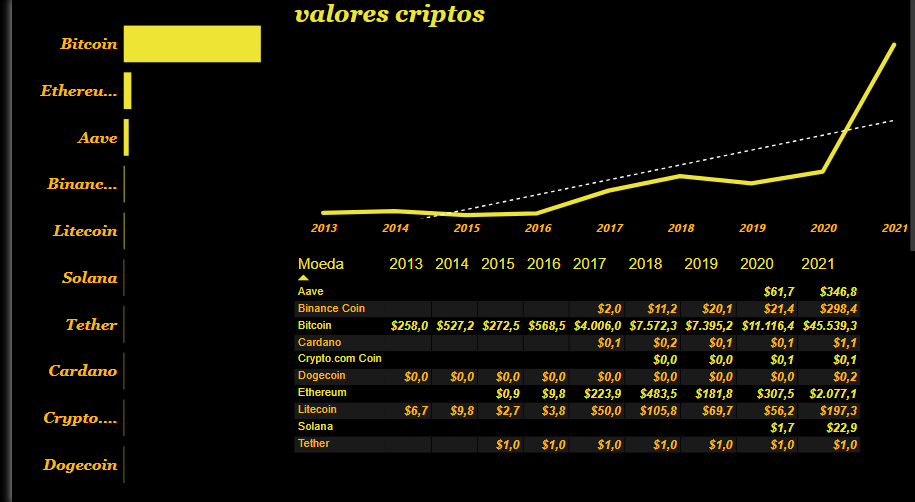

Como podemos identificar no gr√°fico e valores auxiliares, todas as criptomoedas tiveram uma valoriza√ß√£o ao longo do per√≠odo, com incremento do valor ao final do relat√≥rio, os valores se mantiveram est√°veis de 2013 a 2016, a partir de 2016 tivemos um crescimento significativo at√© 2020, o pico ocorrendo em 2021 puxado pela pandemia, onde foi marcado pela ado√ß√£o institucional de cripto, com investidores de todos os perfis reconhecendo os ativos digitais como uma classe que estava transformando todas as ind√∫strias.

2. Quais os valores m√©dios para todas as criptomoedas?

In [14]:
media_criptos = data_clean.groupby('Nome')[['Abertura', 'Fechamento']].mean()
media_criptos = media_criptos.sort_values(by='Fechamento', ascending=False)
media_criptos

Abertura   Fechamento
Nome                                     
Bitcoin          6700.146240  6711.290443
Ethereum          382.879899   383.910691
Aave              254.506688   255.525845
Binance Coin       52.028231    52.250308
Litecoin           49.247365    49.279008
Solana             10.400225    10.471388
Tether              1.000656     1.000696
Cardano             0.255287     0.256313
Crypto.com Coin     0.081802     0.081912
Dogecoin            0.013669     0.013763

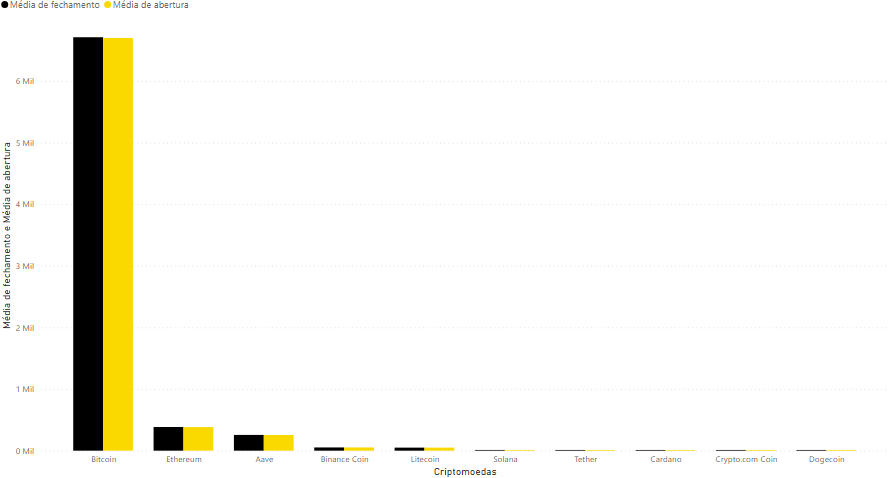

Os dados mostram que o Bitcoin teve a maior m√©dia de fechamento com 6.711,29 e foi 48.764.419,23% maior do que Dogecoin, que teve o menor m√©dia de fechamento em 0,01.
Em todas as 10 Criptomoedas, a m√©dia de fechamento variou de 0,01 para 6.711,29 e m√©dia de abertura variou de 0,01 para 6.700,15, a m√©dia de fechamento sempre √© superior a m√©dia de abertura, mostrando que no per√≠odo a t√™ndencia na m√©dia sempre foi de ganho no fechamento.

In [15]:
correlacao = media_criptos['Abertura'].corr(media_criptos['Fechamento'])
correlacao

0.9999999949654004

Podemos constatar que a m√©dia de fechamento e m√©dia de abertura est√£o correlacionados positivamente entre si.

- 3. Em quais anos houve maiores quedas e valoriza√ß√µes?

Cria√ß√£o da coluna Ano para realizar a agrupamento dos valores.

In [16]:
data_clean['Data'] = pd.to_datetime(data_clean['Data'])
data_clean['Ano'] = data_clean['Data'].dt.year
data_clean

Nome Simbolo       Data    Maximo    Minimo  Abertura  \
0               Solana     SOL 2020-04-11  1.049073  0.765020  0.951054   
1               Solana     SOL 2020-04-12  0.956670  0.762426  0.785448   
2               Solana     SOL 2020-04-13  0.891603  0.773976  0.890760   
3               Solana     SOL 2020-04-14  0.796472  0.628169  0.777832   
4               Solana     SOL 2020-04-15  0.704964  0.621531  0.669289   
...                ...     ...        ...       ...       ...       ...   
17693  Crypto.com Coin     CRO 2021-07-02  0.114202  0.108968  0.112168   
17694  Crypto.com Coin     CRO 2021-07-03  0.119593  0.112773  0.113903   
17695  Crypto.com Coin     CRO 2021-07-04  0.125262  0.117165  0.118389   
17696  Crypto.com Coin     CRO 2021-07-05  0.122467  0.113482  0.122467   
17697  Crypto.com Coin     CRO 2021-07-06  0.124989  0.115725  0.115725   

       Fechamento        Volume  Cap. de Mercado   Ano  
0        0.776819  4.386244e+07     0.000000e+00  2020  
1        0.882507  3.873690e+07     0.000000e+00  2020  
2        0.777832  1.821129e+07     0.000000e+00  2020  
3        0.661925  1.674761e+07     0.000000e+00  2020  
4        0.646651  1.307528e+07     0.000000e+00  2020  
...           ...           ...              ...   ...  
17693    0.113914  4.495990e+07     2.877801e+09  2021  
17694    0.118407  4.578038e+07     2.991307e+09  2021  
17695    0.122427  4.174486e+07     3.092883e+09  2021  
17696    0.115814  4.728913e+07     2.925805e+09  2021  
17697    0.122856  1.520764e+08     3.103718e+09  2021  

[17698 rows x 10 columns]

Agrupamento da m√©dia dos valores por ano.

In [17]:
oscilacao_ano = data_clean.groupby('Ano')['Fechamento'].mean()
oscilacao_ano

Ano
2013     128.173326
2014     179.027307
2015      65.286914
2016     116.611824
2017     753.197509
2018    1159.991910
2019     958.485501
2020    1284.932811
2021    4848.420770
Name: Fechamento, dtype: float64

In [18]:
df_oscilacao = pd.DataFrame(oscilacao_ano)
df_oscilacao

Fechamento
Ano              
2013   128.173326
2014   179.027307
2015    65.286914
2016   116.611824
2017   753.197509
2018  1159.991910
2019   958.485501
2020  1284.932811
2021  4848.420770

In [19]:
oscilacao = {'Ano': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
        'media_fechamento': [128.173326, 179.027307, 65.286914, 116.611824, 753.197509, 1159.991910, 958.485501, 1284.932811, 4848.420770]}


In [20]:
df_oscilacao = pd.DataFrame(oscilacao)
df_oscilacao['percentual_mudanca'] = df_oscilacao['media_fechamento'].pct_change() * 100
df_oscilacao.round(2)

Ano  media_fechamento  percentual_mudanca
0  2013            128.17                 NaN
1  2014            179.03               39.68
2  2015             65.29              -63.53
3  2016            116.61               78.61
4  2017            753.20              545.90
5  2018           1159.99               54.01
6  2019            958.49              -17.37
7  2020           1284.93               34.06
8  2021           4848.42              277.33

Levando em considera√ß√£o todas as criptomoedas e considerando a m√©dia de fechamento, o ano de 2015 foi o que teve maior desvaloriza√ß√£o dos ativos chegando a cair 63,53%, j√° o ano de 2017 foi o que teve maior valoriza√ß√£o com 545.90%.

- 4. Existe alguma tend√™ncia de aumento ou queda dos valores pelo dia da semana?

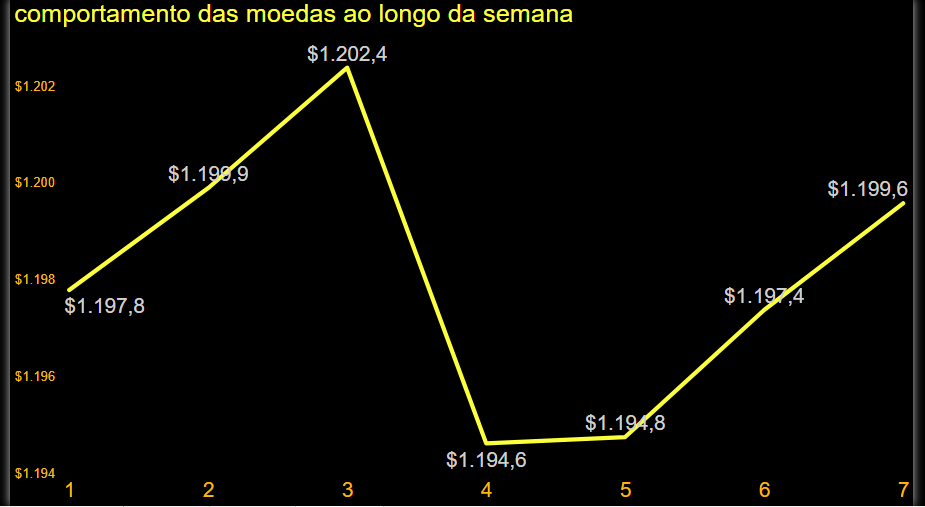

Legenda:
1 = Domingo <br>
2 = Segunda  <br>
3 = Ter√ßa  <br>
4 = Quarta  <br>
5 = Quinta  <br>
6 = Sexta  <br>
7 = S√°bado  <br>

De acordo com os dados, na m√©dia de fechamento do per√≠odo temos a ter√ßa-feira com forte tend√™ncia de alta, obtendo o melhor resultado pelo dia da semana. A quarta-feira e quinta-feira tiveram resultados praticamente iguais, s√£o os dias que tem uma forte tend√™ncia de baixa.

- 5. Qual moeda se mostra mais interessante em rela√ß√£o √† valoriza√ß√£o pela an√°lise da s√©rie
hist√≥rica?

In [21]:
data_clean['Data'] = pd.to_datetime(data_clean['Data'])

grouped = data_clean.groupby('Nome')

valorizacao_por_cripto = {}

for nome, group in grouped:
	preco_inicial = group.iloc[0]['Fechamento']
	preco_final = group.iloc[-1]['Fechamento']
	valorizacao = preco_final - preco_inicial
	valorizacao_por_cripto[nome] = valorizacao


In [39]:
df_valorizacao = pd.DataFrame(list(valorizacao_por_cripto.items()), columns=['Criptomoeda', 'Valorizacao']).round(2)
df_valorizacao = df_valorizacao.sort_values(by='Valorizacao', ascending=False)
df_valorizacao = df_valorizacao.reset_index(drop=True)
df_valorizacao

Criptomoeda  Valorizacao
0          Bitcoin     34090.65
1         Ethereum      2323.93
2     Binance Coin       320.83
3             Aave       263.68
4         Litecoin       134.60
5           Solana        33.49
6          Cardano         1.39
7         Dogecoin         0.23
8  Crypto.com Coin         0.11
9           Tether        -0.21

In [40]:
indice_max_valorizacao = df_valorizacao['Valorizacao'].idxmax()
linha_max_valorizacao = df_valorizacao.loc[indice_max_valorizacao]
linha_max_valorizacao

Criptomoeda     Bitcoin
Valorizacao    34090.65
Name: 0, dtype: object

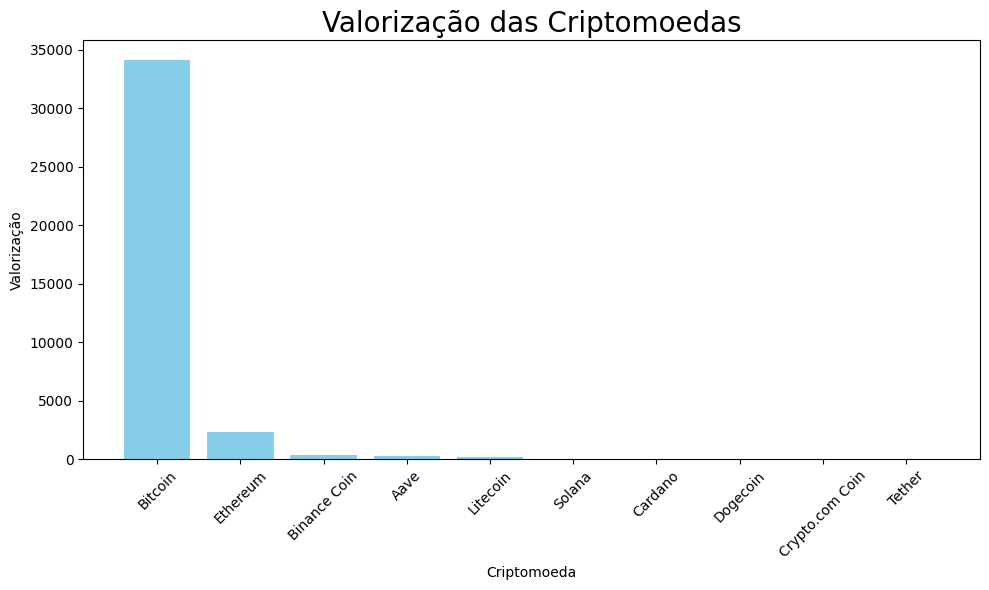

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(df_valorizacao['Criptomoeda'], df_valorizacao['Valorizacao'], color='skyblue')
plt.xlabel('Criptomoeda')
plt.ylabel('Valoriza√ß√£o')
plt.title('Valoriza√ß√£o das Criptomoedas')
plt.xticks(rotation=45)
plt.show()

Como podemos identificar, o bitcoin foi a moeda que teve a melhor valoriza√ß√£o ao longo do tempo, para se ter uma ideia, para a 2¬∫ colocada que foi a criptomoeda Ethereum chegar no valor do bitcoin, precisaria de mais de 14 vezes a valoriza√ß√£o atual, de longe, o bitcoin foi a melhorar valoriza√ß√£o entre as 10 criptomoedas analisadas nesse relat√≥rio.

- 6. Qual moeda se mostra menos interessante em rela√ß√£o √† valoriza√ß√£o pela an√°lise da s√©rie
hist√≥rica?

In [24]:
indice_min_valorizacao = df_valorizacao['Valorizacao'].idxmin()
linha_min_valorizacao = df_valorizacao.loc[indice_min_valorizacao]
linha_min_valorizacao

Criptomoeda    Tether
Valorizacao     -0.21
Name: 9, dtype: object

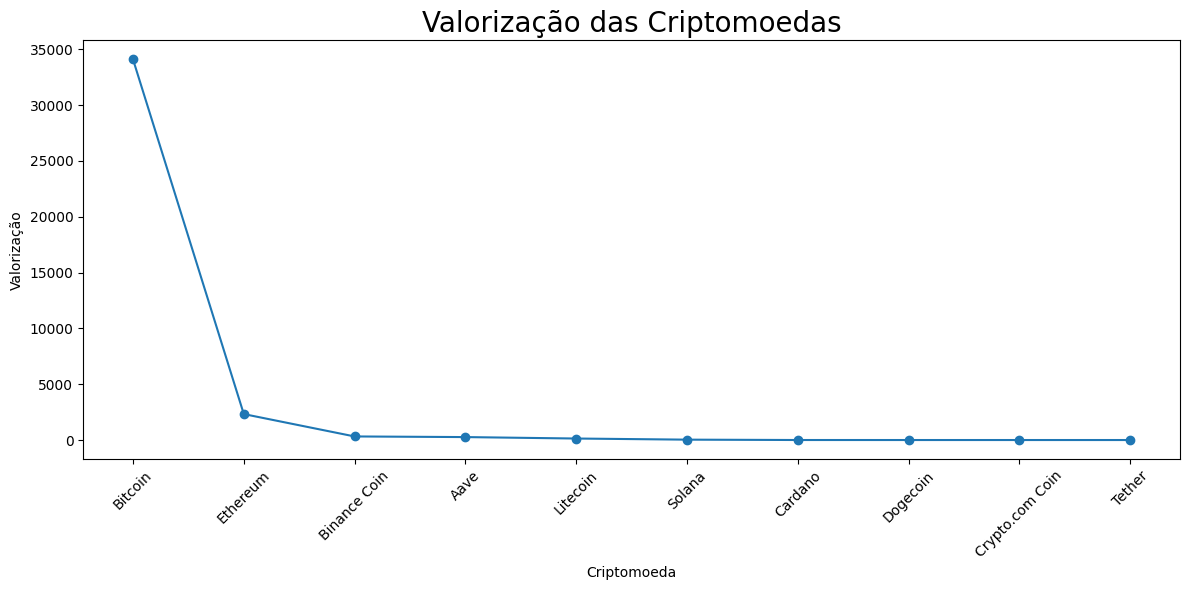

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df_valorizacao['Criptomoeda'], df_valorizacao['Valorizacao'], marker='o', linestyle='-')
plt.xlabel('Criptomoeda')
plt.ylabel('Valoriza√ß√£o')
plt.title('Valoriza√ß√£o das Criptomoedas')
plt.xticks(rotation=45)  # Rota√ß√£o dos r√≥tulos do eixo x para melhor legibilidade
plt.show()

A Criptomoeda Tether foi a que teve maior desvaloriza√ß√£o entre as 10 criptomoedas analisadas, perdendo -0.21 do seu valor, foi a √∫nica que ficou negativa, sabemos que o stablecoin tem seu pre√ßo atrelado a USD $ 1,00 d√≥lar e com isso torna seu valor mais sucet√≠vel as varia√ß√µes do mercado.

- 7. Existe correla√ß√£o entre os valores para todas as criptomoedas?

In [25]:
media_fechamento = data_clean.groupby(['Data','Nome'])['Fechamento'].mean().unstack()

correlacao = media_fechamento.corr().round(2)
correlacao

Nome             Aave  Binance Coin  Bitcoin  Cardano  Crypto.com Coin  \
Nome                                                                     
Aave             1.00          0.77     0.88     0.84             0.61   
Binance Coin     0.77          1.00     0.86     0.89             0.63   
Bitcoin          0.88          0.86     1.00     0.86             0.67   
Cardano          0.84          0.89     0.86     1.00             0.62   
Crypto.com Coin  0.61          0.63     0.67     0.62             1.00   
Dogecoin         0.61          0.89     0.65     0.83             0.43   
Ethereum         0.87          0.90     0.90     0.96             0.61   
Litecoin         0.87          0.64     0.81     0.77             0.57   
Solana           0.70          0.95     0.72     0.93             0.42   
Tether           0.07         -0.08     0.04    -0.07            -0.33   

Nome             Dogecoin  Ethereum  Litecoin  Solana  Tether  
Nome                                                           
Aave                 0.61      0.87      0.87    0.70    0.07  
Binance Coin         0.89      0.90      0.64    0.95   -0.08  
Bitcoin              0.65      0.90      0.81    0.72    0.04  
Cardano              0.83      0.96      0.77    0.93   -0.07  
Crypto.com Coin      0.43      0.61      0.57    0.42   -0.33  
Dogecoin             1.00      0.84      0.54    0.93    0.00  
Ethereum             0.84      1.00      0.83    0.93    0.03  
Litecoin             0.54      0.83      1.00    0.81    0.08  
Solana               0.93      0.93      0.81    1.00   -0.14  
Tether               0.00      0.03      0.08   -0.14    1.00

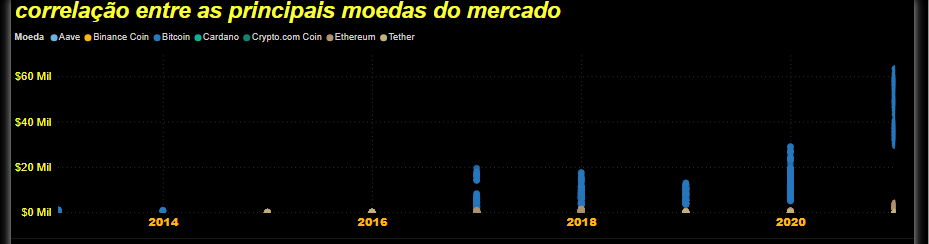

A correla√ß√£o mais forte entre as cripto moedas foi constata entre a cardano e ethereum com 0.96, ou seja, h√° uma rela√ß√£o linear positiva entre essas moedas. <BR>
As criptomoedas que tiveram a pior correla√ß√£o s√£o Crypto.com Coin x Tether com uma correla√ß√£o negativa de -0.33, isto √©, indicando que s√£o inversamente relacionadas.

## Conclus√£o

Os dados mostraram que as criptomoedas de forma geral tiveram uma tend√™ncia de aumento, sendo puxado principalmente pelo bitcoin, que √© o alicerce da comunidade cripto, em 2021 obtivemos o melhor resultado em termos financeiros para todas as criptos, exceto, Dogecoin, Crypto.com coin e Tether.
Foi identicados os dias que tem em m√©dia mais aumento e quedas, s√£o dados extremamente importantes para um mercado que "n√£o dorme", s√£o transa√ß√µes 24h e 7 dias por semana, sendo a ter√ßa-feira com uma tend√™ncia de aumento e quarta-feira como o dia com forte tend√™ncia de queda.

Como foi mostrado no decorrer do relat√≥rio, o bitcoin se mostrou a moeda que teve o melhor desempenho no per√≠odo analisado, seguido por Ethereum que faz parte da 2¬∫ gera√ß√£o das moedas e por fim no top 3 tivemos a criptomoeda Binance coin que faz parte da 3¬∫ gera√ß√£o, cada gera√ß√£o de criptomoedas surgiu na inten√ß√£o de resolver algum problema encontrado na cadeia econ√¥mica. Por√©m, como nem tudo ainda foi solucionado, n√£o h√° d√∫vidas que novas gera√ß√µes podem estar a caminho.